# 卷积模块介绍

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# 卷积
tensorflow中的API是 **`tf.nn.conv2d()`**

- 第一个参数input是输入, 要求一个形状为(a, b, c, d)的tensor,也就是通常说的4维张量. 它具有两种形式:NHWC , NCHW, 表示输入的通道在第二维或者是第四维, 在后面的参数data_format中可以进行选择

<br>
- 第二个参数filter就是参与卷积的卷积核, 要求是一个4维张量, 形状是[height, width, in_depth, out_depth]. 其中height, width表示卷积核本身的大小, in_depth必须和input的通道数保持一致, out_depth表示卷积核的个数

<br>
- 第三个参数strides是卷积核滑动的步长, 要求是一个4维张量, 第二维和第三维表示卷积核的大小, 对于NHWC的输入来说形状是(1, stride_h, stride_w, 1), 对于NCHW的输入来说是(1, 1, stride_h, stride_w)

<br>
- 第四个参数padding是补洞策略, 可以选择"SAME"或者是"VALID", 区别之后会解释

<br>
- 后面几个参数暂时不用管

In [2]:
# 读入一张灰度图的图片
image = Image.open('img/kitty.png').convert('L') 
image = np.array(image, dtype=np.float32)

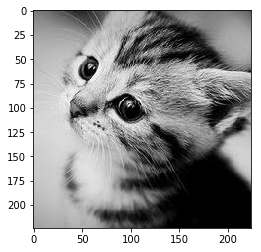

In [3]:
#可视化
plt.imshow(image, cmap='gray')

In [4]:
# 将图片矩阵转化为 tensor，并适配卷积输入的要求
image = tf.constant(image.reshape((1,image.shape[0],image.shape[1],1)), 
                    dtype=tf.float32)

# 定义一个边缘检测算子`sobel_kernel`, 并规范形状
sobel_kernel = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]], dtype=np.float32)
sobel_kernel = tf.constant(sobel_kernel, shape=(3,3,1,1))

In [5]:
# 进行卷积
conv1 = tf.nn.conv2d(input=image, filter=sobel_kernel, strides=[1,1,1,1],
                     padding='SAME', name='same_conv')

conv2 = tf.nn.conv2d(input=image, filter=sobel_kernel, strides=[1,1,1,1],
                    padding='VALID', name='valid_conv')

In [6]:
sess = tf.InteractiveSession()
conv1_np = sess.run(conv1)
conv2_np = sess.run(conv2)

Text(0.5, 1.0, 'shape = (1, 224, 224, 1)')

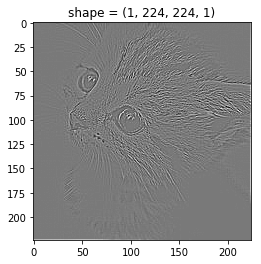

In [7]:
# squeeze 函数：从数组的形状中删除单维度条目，即把shape中为1的维度去掉
plt.imshow(np.squeeze(conv1_np), cmap='gray')
plt.title('shape = {}'.format(conv1.shape))

In [10]:
plt.imshow(np.squeeze(conv2_np), cmap='gray')
plt.title('shape = {}'.format(conv2_np.shape))

NameError: name 'conv2_np' is not defined

# 池化
在这里我们讨论最大值池化.最大值池化在原生的tensorflow中的AP是 **`tf.nn.max_pool()`**    
和`tf.nn.conv2d`的参数类似, 它也有value(对应于卷积的input), strides, padding等参数, 唯一不同的就是ksize这个参数. 这是由于池化层的kernel只需要知道大小造成的, 在输入是NHWC时它的形状是(1, ksize_h, ksize_w, 1)

In [12]:
pool1 = tf.nn.max_pool(value=image, ksize=[1,2,2,1], strides=[1,2,2,1],
                      padding='SAME', name='same_max_pool')

pool2 = tf.nn.max_pool(value=image, ksize=[1,2,2,1], strides=[1,2,2,1],
                      padding='VALID', name='valide_max_pool')

In [13]:
pool1_np, pool2_np = sess.run([pool1, pool2])

Text(0.5, 1.0, 'shape=(1, 112, 112, 1)')

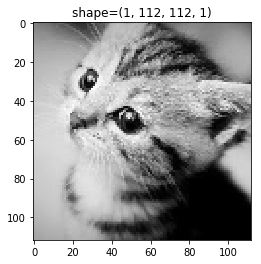

In [14]:
plt.imshow(np.squeeze(pool1_np), cmap='gray')
plt.title('shape={}'.format(pool1_np.shape))

Text(0.5, 1.0, 'shape=(1, 112, 112, 1)')

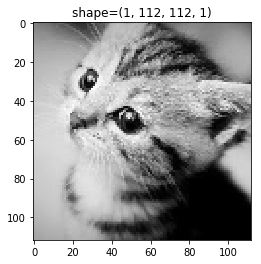

In [15]:
plt.imshow(np.squeeze(pool2_np), cmap='gray')
plt.title('shape={}'.format(pool2_np.shape))